 **Chennai House Price Prediction** 

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.shape

(7109, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Data Cleaning**

In [5]:
#checking null values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

*Handling* missin value

In [6]:
# applying mean to the missing  values
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mean(),"N_BATHROOM":df["N_BATHROOM"].mean(),"QS_OVERALL":df["QS_OVERALL"].mean()})

In [7]:
# checking null values
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [9]:
#checking for any duplicates
df[df.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [10]:
# to changing the data types
df ['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df ['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [11]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [12]:
# to check the columns for error correction
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [13]:
# to correct the error
df.replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","TNagar":"T Nagar","Adyr":"Adyar","Karapakam":"Karapakkam","Velchery":"Velachery","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","KKNagar":"KK Nagar"},inplace = True)

In [14]:
# to checking correction again
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [15]:
#describing the sqft 
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [16]:
df.INT_SQFT.min()

500

In [17]:
df.INT_SQFT.max()

2500

In [18]:
df.INT_SQFT.mean()

1382.0730060486708

In [19]:
# To coverting date_sale like a year
df['DATE_SALE']=pd.DatetimeIndex(df['DATE_SALE']).year
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011,51,1,1,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004,52,3,2,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006,152,2,1,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009,40,1,1,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [20]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE          int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011,51,1,1,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004,52,3,2,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006,152,2,1,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009,40,1,1,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


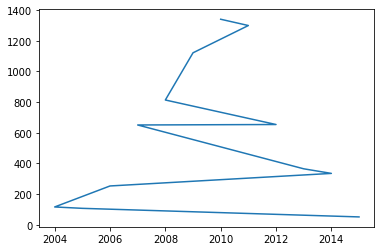

In [21]:
df['DATE_SALE'].value_counts().plot(kind="line")
df

In [22]:
df.DIST_MAINROAD.min()

0

In [23]:
df.DIST_MAINROAD.max()

200

In [24]:
df.DIST_MAINROAD.mean()

99.60317906878605

In [25]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

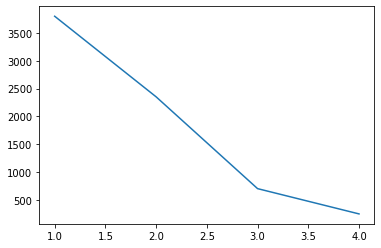

In [26]:
df.N_BEDROOM.value_counts().plot(kind="line")

In [27]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

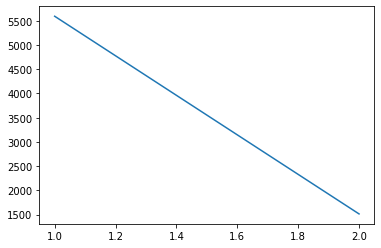

In [28]:
df.N_BATHROOM.value_counts().plot(kind="line")

In [29]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

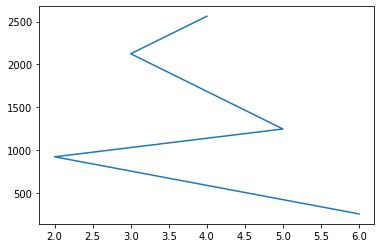

In [30]:
df.N_ROOM.value_counts().plot(kind="line")

In [31]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [32]:
df.replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)

In [33]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [34]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [35]:
df.replace({'Noo':'No'},inplace=True)

In [36]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [37]:
# To coverting date_build like a year
df['DATE_BUILD']=pd.DatetimeIndex(df['DATE_BUILD']).year
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011,51,1,1,2,AdjLand,No,1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004,52,3,2,5,Family,Yes,1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006,152,2,1,4,Normal Sale,No,1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009,40,1,1,2,Partial,Yes,1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [38]:
df.replace({'Comercial':'Commercial','Other':'Others'},inplace = True)

In [39]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [40]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [41]:
df.replace({'All Pub':'AllPub'},inplace=True)

In [42]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [43]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [44]:
df.replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [45]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [46]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [47]:
df=df.drop(['REG_FEE','COMMIS'],axis=1)
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [48]:
df['BUILDING_AGE']=df.DATE_SALE-df.DATE_BUILD
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,P03210,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,P09411,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,P01812,Adyar,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,P05346,Velachery,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,P06210,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [49]:
df.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [50]:
df.QS_BATHROOM.unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [51]:
df.QS_BEDROOM.unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [52]:
df.QS_OVERALL.unique()

array([4.33      , 3.765     , 3.09      , 4.01      , 3.29      ,
       3.32      , 2.67      , 3.26      , 3.55      , 3.16      ,
       3.83      , 2.89      , 2.26      , 3.19      , 3.66      ,
       3.50325379, 3.57      , 4.3       , 3.35      , 4.76      ,
       3.39      , 3.43      , 3.73      , 3.59      , 3.74      ,
       2.29      , 3.17      , 4.18      , 2.755     , 2.11      ,
       2.605     , 4.58      , 4.2       , 3.27      , 4.19      ,
       2.98      , 3.12      , 3.08      , 3.85      , 3.42      ,
       3.2       , 4.        , 3.34      , 2.825     , 3.46      ,
       4.07      , 3.68      , 2.95      , 3.505     , 2.97      ,
       3.63      , 3.76      , 3.77      , 2.78      , 3.985     ,
       3.04      , 2.88      , 4.21      , 2.42      , 3.8       ,
       2.54      , 3.84      , 2.395     , 3.14      , 2.49      ,
       3.175     , 2.84      , 4.17      , 3.13      , 3.98      ,
       3.36      , 3.735     , 2.62      , 4.61      , 2.6    

In [53]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in all columns to convert words/objects/characters to numbers/integers 
df['PRT_ID']= label_encoder.fit_transform(df['PRT_ID'])

In [54]:
#finding average sales price by area
a=df.groupby(['AREA']).mean().SALES_PRICE
a

AREA
Adyar         9.185668e+06
Anna Nagar    1.516820e+07
Chrompet      1.001381e+07
KK Nagar      1.269623e+07
Karapakkam    7.340100e+06
T Nagar       1.561674e+07
Velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [55]:
#sorting average sales price by area
s=sorted(a.items(),key=lambda kv:(kv[1],kv[0]))
s

[('Karapakkam', 7340100.109809663),
 ('Adyar', 9185668.391472869),
 ('Chrompet', 10013809.64747356),
 ('Velachery', 11047353.027522936),
 ('KK Nagar', 12696228.746238716),
 ('Anna Nagar', 15168201.9035533),
 ('T Nagar', 15616742.59481038)]

In [56]:
#encoding the values on
df['AREA']=df['AREA'].replace({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})

In [57]:
df.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

In [58]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,2266,1,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6664,6,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1270,2,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3755,4,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,4393,1,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [59]:
a=df.groupby(['SALE_COND']).mean().SALES_PRICE
s=sorted(a.items(),key=lambda kv:(kv[1],kv[0]))
s


[('Partial', 10616369.351011863),
 ('Family', 10736415.498930862),
 ('AbNormal', 10914631.562721474),
 ('Normal Sale', 10994177.803935347),
 ('AdjLand', 11209314.975677554)]

In [60]:
df['SALE_COND']=df['SALE_COND'].replace({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})


In [61]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,2266,1,1004,2011,131,1,1,3,3,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6664,6,1986,2006,26,2,1,5,3,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1270,2,909,2012,70,1,1,3,3,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3755,4,1855,2010,14,3,2,5,2,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,4393,1,1226,2009,84,1,1,3,3,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [62]:
a=df.groupby(['BUILDTYPE']).mean().SALES_PRICE
s=sorted(a.items(),key=lambda kv:(kv[1],kv[0]))
s


[('House', 9098846.581423895),
 ('Others', 9807998.01583904),
 ('Commercial', 13869836.073422069)]

In [63]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({"House":1,"Others":2,"Commercial":3})


In [64]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,2266,1,1004,2011,131,1,1,3,3,Yes,1967,3,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6664,6,1986,2006,26,2,1,5,3,No,1995,3,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1270,2,909,2012,70,1,1,3,3,Yes,1992,3,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3755,4,1855,2010,14,3,2,5,2,No,1988,2,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,4393,1,1226,2009,84,1,1,3,3,Yes,1979,2,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [65]:
df=pd.get_dummies(df,columns=['PARK_FACIL'])

In [66]:
df=pd.get_dummies(df,columns=['UTILITY_AVAIL'])

In [67]:
a=df.groupby(['STREET']).mean().SALES_PRICE
s=sorted(a.items(),key=lambda kv:(kv[1],kv[0]))
s


[('No Access', 10000738.430837879),
 ('Paved', 11057536.708786936),
 ('Gravel', 11444618.569444444)]

In [68]:
df['STREET']=df['STREET'].replace({"No Access":1,"Paved":2,"Gravel":3})

In [69]:
a=df.groupby(['MZZONE']).mean().SALES_PRICE
s=sorted(a.items(),key=lambda kv:(kv[1],kv[0]))
s


[('A', 7292591.080074488),
 ('C', 8052270.172727273),
 ('I', 8738632.723809524),
 ('RH', 11039971.550493963),
 ('RL', 11765762.54305705),
 ('RM', 12407069.603742432)]

In [70]:
df['MZZONE']=df['MZZONE'].replace({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})

In [71]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,DATE_BUILD,BUILDTYPE,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE,PARK_FACIL_No,PARK_FACIL_Yes,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,2266,1,1004,2011,131,1,1,3,3,1967,3,2,1,4.0,3.9,4.9,4.330,7600000,44,0,1,1,0,0,0
1,6664,6,1986,2006,26,2,1,5,3,1995,3,3,4,4.9,4.2,2.5,3.765,21717770,11,1,0,1,0,0,0
2,1270,2,909,2012,70,1,1,3,3,1992,3,3,5,4.1,3.8,2.2,3.090,13159200,20,0,1,0,1,0,0
3,3755,4,1855,2010,14,3,2,5,2,1988,2,2,3,4.7,3.9,3.6,4.010,9630290,22,1,0,0,0,0,1
4,4393,1,1226,2009,84,1,1,3,3,1979,2,3,2,3.0,2.5,4.1,3.290,7406250,30,0,1,1,0,0,0


In [72]:
df.corr()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,DATE_BUILD,BUILDTYPE,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE,PARK_FACIL_No,PARK_FACIL_Yes,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
PRT_ID,1.000000,0.046430,0.114991,-0.968381,-0.011866,0.166040,0.083638,0.103123,0.005641,-0.201550,-0.000897,0.013355,-0.094177,-0.001896,0.000825,-0.001631,0.002527,0.019078,0.033496,-0.004354,0.004354,0.003810,0.029409,-0.014146,-0.017194
AREA,0.046430,1.000000,0.685243,-0.022809,0.003487,0.320889,-0.044401,0.644971,-0.001571,0.066407,0.014790,0.071459,0.346385,0.022620,0.002351,0.004147,0.017745,0.694149,-0.072180,-0.007916,0.007916,0.024412,-0.063226,0.019572,0.014954
INT_SQFT,0.114991,0.685243,1.000000,-0.123840,0.002022,0.786263,0.515290,0.951279,0.004029,-0.009301,0.009084,0.091727,0.143226,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610,-0.004618,0.004618,0.027580,-0.089793,0.025290,0.030922
DATE_SALE,-0.968381,-0.022809,-0.123840,1.000000,0.012821,-0.185263,-0.105395,-0.109391,-0.001509,0.228082,-0.001764,-0.010530,0.125181,0.003002,-0.000047,0.002794,0.000028,0.000906,-0.055050,0.004268,-0.004268,-0.000803,-0.030809,0.017194,0.012400
DIST_MAINROAD,-0.011866,0.003487,0.002022,0.012821,1.000000,-0.002723,0.001850,0.002301,-0.009342,0.005706,0.023924,0.001942,0.007334,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559,0.009448,-0.009448,-0.008859,0.012707,-0.014840,0.011974
N_BEDROOM,0.166040,0.320889,0.786263,-0.185263,-0.002723,1.000000,0.755207,0.840209,0.006868,0.012421,-0.003155,0.117058,0.049928,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873,0.009357,-0.009357,0.033766,-0.111240,0.031149,0.038896
N_BATHROOM,0.083638,-0.044401,0.515290,-0.105395,0.001850,0.755207,1.000000,0.568541,0.010695,0.001514,-0.014043,0.071575,-0.047164,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403,0.014033,-0.014033,0.013895,-0.071477,0.021273,0.031606
N_ROOM,0.103123,0.644971,0.951279,-0.109391,0.002301,0.840209,0.568541,1.000000,0.000969,0.013409,0.008122,0.089961,0.163697,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316,0.000934,-0.000934,0.023263,-0.083528,0.021138,0.033587
SALE_COND,0.005641,-0.001571,0.004029,-0.001509,-0.009342,0.006868,0.010695,0.000969,1.000000,-0.011034,-0.002842,-0.002525,0.000122,-0.007720,0.004049,0.003840,0.001542,0.054370,0.011045,-0.003936,0.003936,-0.006846,0.002936,0.014087,-0.010031
DATE_BUILD,-0.201550,0.066407,-0.009301,0.228082,0.005706,0.012421,0.001514,0.013409,-0.011034,1.000000,0.011289,0.036710,0.129873,-0.018704,-0.021168,0.018011,-0.012200,0.116043,-0.984721,-0.008042,0.008042,0.020874,-0.051019,0.013351,0.013339


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRT_ID,7109.0,3.554000e+03,2.052336e+03,0.0,1777.00,3.554000e+03,5331.00,7108.00
AREA,7109.0,3.539738e+00,1.846837e+00,1.0,2.00,3.000000e+00,5.00,7.00
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1.373000e+03,1744.00,2500.00
DATE_SALE,7109.0,2.009768e+03,2.205979e+00,2004.0,2008.00,2.010000e+03,2011.00,2015.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,9.900000e+01,148.00,200.00
N_BEDROOM,7109.0,1.636939e+00,8.028806e-01,1.0,1.00,1.000000e+00,2.00,4.00
N_BATHROOM,7109.0,1.213110e+00,4.095336e-01,1.0,1.00,1.000000e+00,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.000000e+00,4.00,6.00
SALE_COND,7109.0,3.004501e+00,1.419073e+00,1.0,2.00,3.000000e+00,4.00,5.00
DATE_BUILD,7109.0,1.985492e+03,1.264886e+01,1949.0,1976.00,1.986000e+03,1996.00,2010.00


In [74]:
corr=df.corr()
corr.shape

(25, 25)

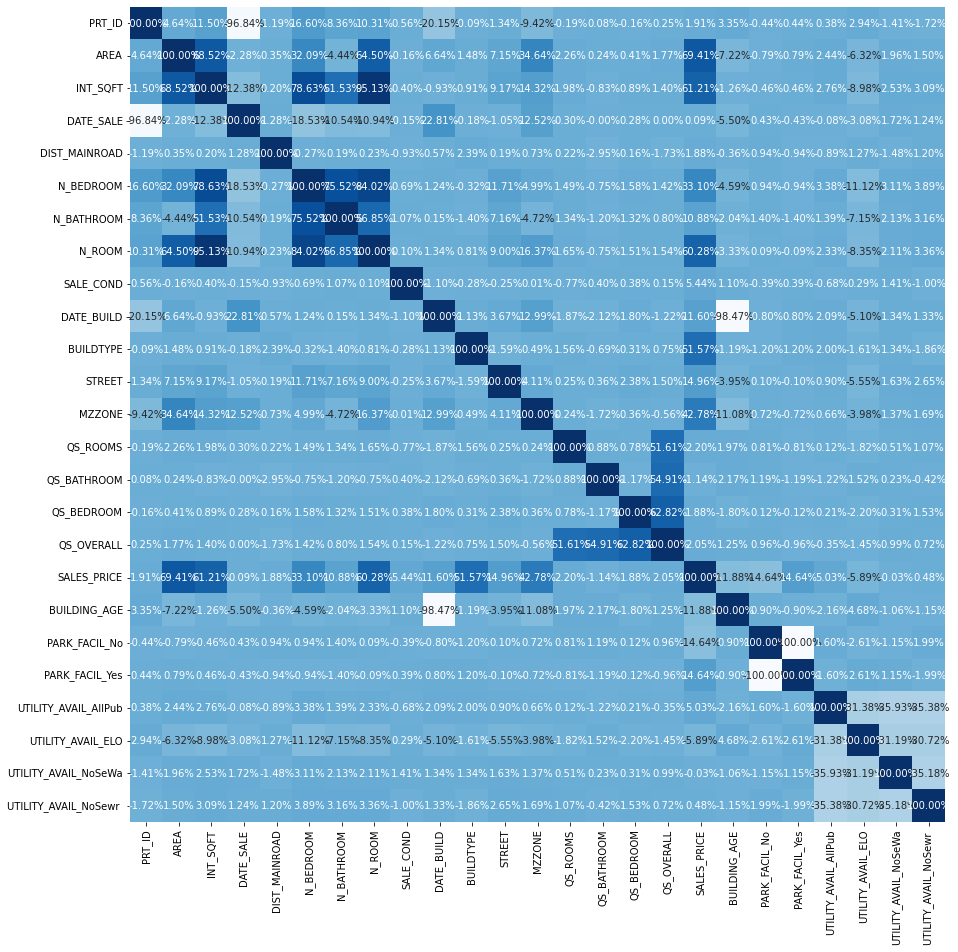

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cbar=False,square=True,fmt='.2%',annot=True,cmap='Blues')

In [76]:
sales_price = df['SALES_PRICE']
sales_price
df=df.drop(['SALES_PRICE'],axis=1)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,DATE_BUILD,BUILDTYPE,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDING_AGE,PARK_FACIL_No,PARK_FACIL_Yes,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr
0,2266,1,1004,2011,131,1,1,3,3,1967,3,2,1,4.0,3.9,4.9,4.330,44,0,1,1,0,0,0
1,6664,6,1986,2006,26,2,1,5,3,1995,3,3,4,4.9,4.2,2.5,3.765,11,1,0,1,0,0,0
2,1270,2,909,2012,70,1,1,3,3,1992,3,3,5,4.1,3.8,2.2,3.090,20,0,1,0,1,0,0
3,3755,4,1855,2010,14,3,2,5,2,1988,2,2,3,4.7,3.9,3.6,4.010,22,1,0,0,0,0,1
4,4393,1,1226,2009,84,1,1,3,3,1979,2,3,2,3.0,2.5,4.1,3.290,30,0,1,1,0,0,0


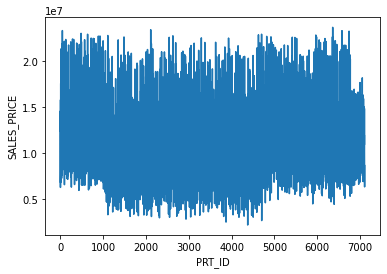

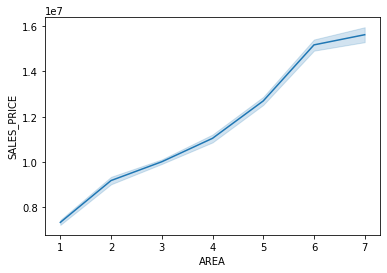

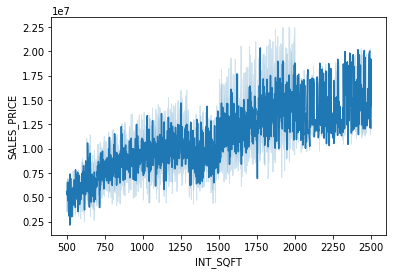

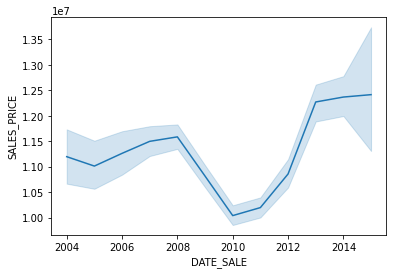

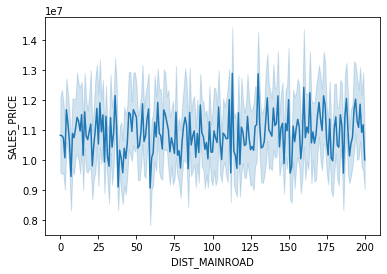

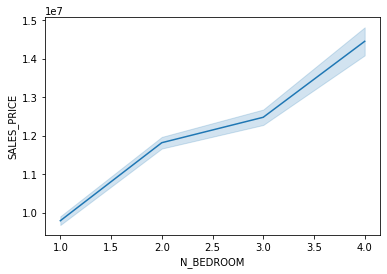

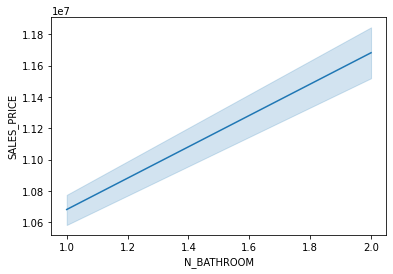

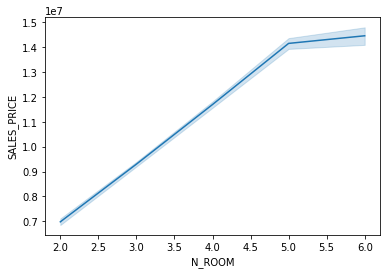

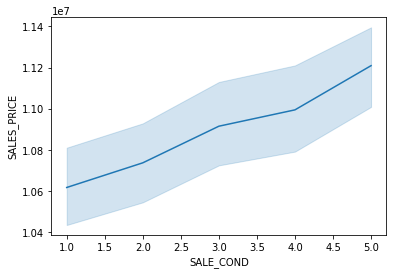

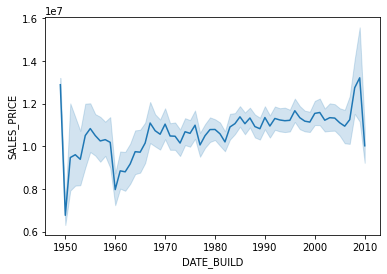

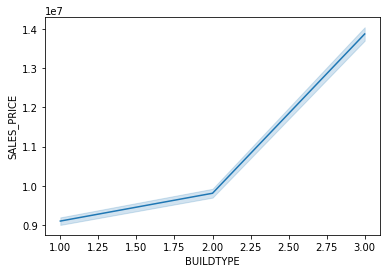

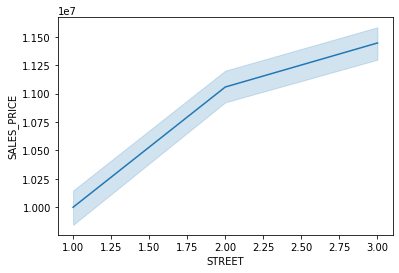

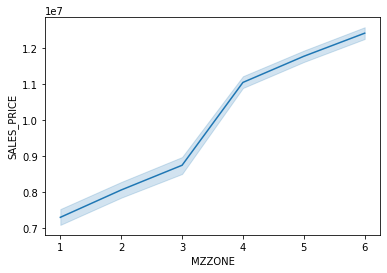

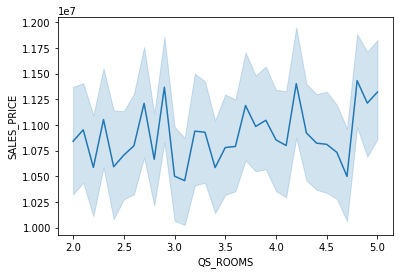

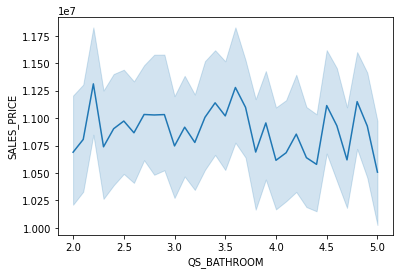

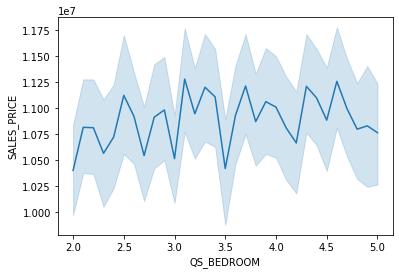

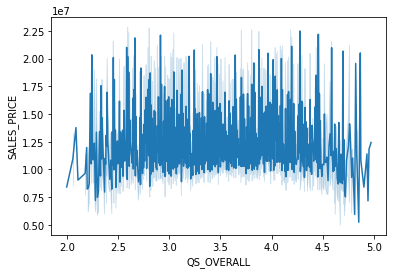

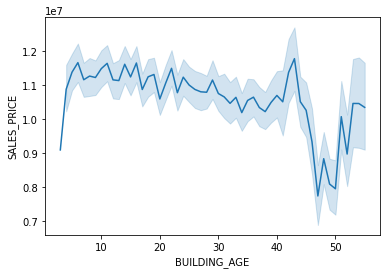

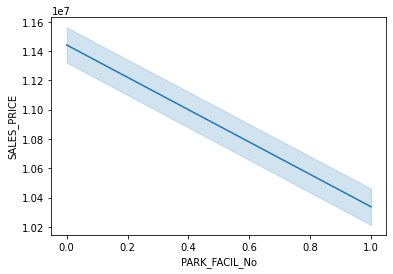

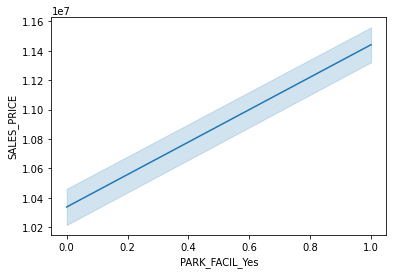

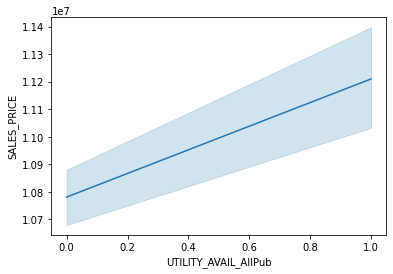

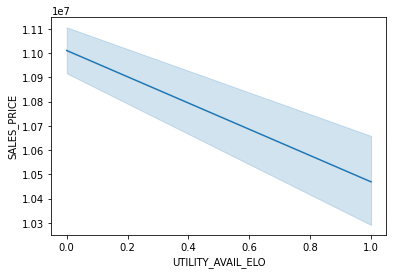

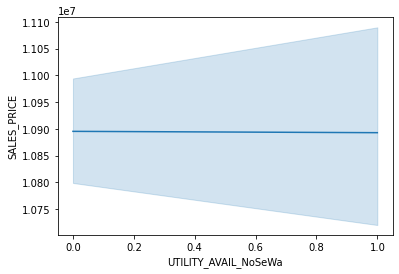

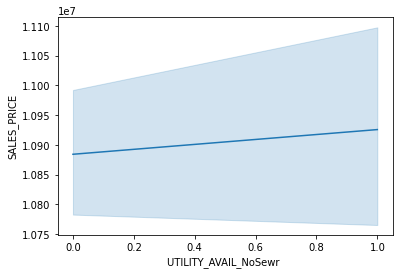

In [77]:
for i in df.columns:
  sns.lineplot(x=df[i],y=sales_price,data=df)
  plt.show()

In [78]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df, sales_price, random_state = 42, test_size=.33)

In [79]:
#implementation on linear regression on out datasets
from sklearn import linear_model
#load the model
lr = linear_model.LinearRegression()
#fit the train data
model = lr.fit(x_train,y_train)
# find the accurancy of the model
print("R^2 score:",model.score(x_test,y_test))

R^2 score: 0.8786756251338371


In [80]:
#predict the test data
prediction=model.predict(x_test)
prediction

array([14010097.92615956,  6967604.78903013, 16280177.06908089, ...,
        6891664.17358077,  6941109.30578148, 10567200.85498965])

In [81]:
#show acutal and predicted data with prt_id
x_test['Predicted_Sales_Price']=prediction.copy()
x_test['Actual_Sales_Price']=y_test.copy()
x_test[['PRT_ID','Actual_Sales_Price','Predicted_Sales_Price']]

,PRT_ID,Actual_Sales_Price,Predicted_Sales_Price
457,1635,12948200,1.401010e+07
1876,1819,7524750,6.967605e+06
6307,4379,16434500,1.628018e+07
3182,1894,6705750,6.059014e+06
1188,4436,15831550,1.445088e+07
...,...,...,...
4296,1274,12756200,1.265828e+07
3262,5856,13991160,1.622716e+07
5433,4972,7759200,6.891664e+06
6253,419,7819750,6.941109e+06


Text(0.5, 1.0, 'Linear Regression Model')

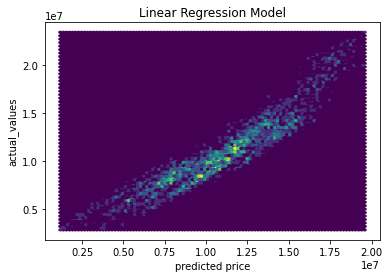

In [86]:
#linear model; graph
actual_values_sales=y_test
plt.hexbin(prediction,actual_values_sales)
plt.xlabel('predicted price')
plt.ylabel('actual_values')
plt.title('Linear Regression Model')